<h1 style="text-align: center;">Análise de Despesas Públicas: Utilizando técnicas de Análise Exploratória de Dados, Big Data e Machine Learning na Prefeitura de Curitiba</h1>


### Acadêmico: Abrahão Scheifer

## 1. Importação de bibliotecas

In [48]:
# Importando as bibliotecas necessárias

import pandas as pd  # Biblioteca para manipulação de dados em formato tabular
import os  # Biblioteca para interação com o sistema operacional
import pyspark  # Biblioteca para processamento de dados distribuído e em grande escala
from pyspark.sql import SparkSession  # Classe para criar uma sessão do Spark
from sklearn.model_selection import train_test_split  # Função para dividir o conjunto de dados em treino e teste
from sklearn.metrics import mean_squared_error, r2_score  # Funções para avaliar o desempenho do modelo
from sklearn.tree import DecisionTreeRegressor  # Classe para criar um modelo de Árvore de Decisão
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor  # Classes para criar modelos de Floresta Aleatória e Extra Trees
import matplotlib.pyplot as plt  # Biblioteca para visualização de dados em gráficos
from sklearn.linear_model import LinearRegression  # Classe para criar um modelo de Regressão Linear
from sklearn.preprocessing import OneHotEncoder  # Classe para realizar o pré-processamento de dados com codificação One-Hot
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  # Classes para realizar busca em grid e busca aleatória de hiperparâmetros
from scipy.stats import randint  # Distribuição estatística utilizada na busca aleatória de hiperparâmetros

## 2. Coleta de dados

In [2]:
# Carregando o dataset

caminho_pasta = r"C:\Users\asche\Área de Trabalho\OficinaMaker\Projeto\Dataset"
nome_arquivo = "Dataset_Despesas.csv"
caminho_arquivo = os.path.join(caminho_pasta, nome_arquivo)

df = pd.read_csv(caminho_arquivo, delimiter=';', encoding='latin1', low_memory=False)
df.head()

,ANO_EMPENHO,DT_EMPENHO,CD_FONTE,DS_FONTE,CD_FUNCAO,DS_FUNCAO,CD_PROGRAMA,DS_PROGRAMA,CD_ACAO,DS_ACAO,...,VL_TOTAL,PROTOCOLOSUP,DT_TRANSACAO,NR_PARCELA,TRANSACAO,VL_LIQUIDADO,VL_DEVOLVIDO,VL_ANULADO,VL_PAGO,VL_CONSIGNADO
0,-----------,----------,--------,--------,---------,---------,-----------,-----------,-------,-------,...,--------,------------,------------,------------,------------,------------,------------,----------,-------,-------------
1,2023,2023-02-03,900,"Fundo do Idoso, inclusive art. 9º IN RFB nº 11...",08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,2008,DESENVOLVIMENTO E EXECUÇÃO DE AÇÕES DE ATENDIM...,...,"5,5600",01-096408/2023,2023-04-20 00:00:00.000,1,Pagamento de Empenho,"0,00","0,00","0,00","15,26","0,00"
2,2023,2023-02-03,900,"Fundo do Idoso, inclusive art. 9º IN RFB nº 11...",08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,2008,DESENVOLVIMENTO E EXECUÇÃO DE AÇÕES DE ATENDIM...,...,"5,5600",01-096408/2023,2023-04-20 00:00:00.000,1,Liquidação de Empenho,"15,26","0,00","0,00","0,00","0,00"
3,2023,2023-03-01,001,Recursos do Tesouro (Descentralizados),06,SEGURANÇA PÚBLICA,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,2025,PREVENÇÃO E ADMINISTRAÇÃO DE POTENCIAIS DESAST...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,2023-03-16,2098,Recursos Próprios do Fundo Municipal de Apoio ...,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,2010,TRANSFERÊNCIA DE RECURSOS ÀS ENTIDADES PRIVADA...,...,NaN,01-203553/2022,2023-03-17 00:00:00.000,1,Liquidação de Empenho,"140400,00","0,00","0,00","0,00","0,00"


### 2.1 Descrição do formato dos dados

In [3]:
# verificando o formato dos dados no dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34419 entries, 0 to 34418
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ANO_EMPENHO                34419 non-null  object
 1   DT_EMPENHO                 34419 non-null  object
 2   CD_FONTE                   34419 non-null  object
 3   DS_FONTE                   34419 non-null  object
 4   CD_FUNCAO                  34419 non-null  object
 5   DS_FUNCAO                  34419 non-null  object
 6   CD_PROGRAMA                34419 non-null  object
 7   DS_PROGRAMA                34419 non-null  object
 8   CD_ACAO                    34419 non-null  object
 9   DS_ACAO                    34419 non-null  object
 10  CD_SUBELEMENTO             34419 non-null  object
 11  DS_SUBELEMENTO             34419 non-null  object
 12  CD_ORGAO                   34419 non-null  object
 13  DS_ORGAO                   34419 non-null  object
 14  CD_DES

### 2.2 Seleção das variáveis relevantes para o projeto

In [4]:
# Selecionando apenas as variáveis relevantes para o projeto:
variaveis_selecionadas = ['ANO_EMPENHO','DT_EMPENHO', 'CD_FUNCAO', 'DS_FUNCAO', 'CD_PROGRAMA',
                          'DS_PROGRAMA', 'CD_ORGAO', 'DS_ORGAO', 'VL_PAGO']
despesas = df[variaveis_selecionadas].copy()

# Salvando o novo DataFrame
df_despesas = despesas

In [5]:
df_despesas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34419 entries, 0 to 34418
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ANO_EMPENHO  34419 non-null  object
 1   DT_EMPENHO   34419 non-null  object
 2   CD_FUNCAO    34419 non-null  object
 3   DS_FUNCAO    34419 non-null  object
 4   CD_PROGRAMA  34419 non-null  object
 5   DS_PROGRAMA  34419 non-null  object
 6   CD_ORGAO     34419 non-null  object
 7   DS_ORGAO     34419 non-null  object
 8   VL_PAGO      28759 non-null  object
dtypes: object(9)
memory usage: 2.4+ MB


### 2.4 Experimentos iniciais realizados no dataset

In [6]:
# Exibindo as 5 primeiras linhas do DataFrame em formato de tabela
display(df_despesas.head(5))

,ANO_EMPENHO,DT_EMPENHO,CD_FUNCAO,DS_FUNCAO,CD_PROGRAMA,DS_PROGRAMA,CD_ORGAO,DS_ORGAO,VL_PAGO
0,-----------,----------,---------,---------,-----------,-----------,--------,--------,-------
1,2023,2023-02-03,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,44,FUNDO MUNICIPAL DOS DIREITOS DA PESSOA IDOSA,"15,26"
2,2023,2023-02-03,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,44,FUNDO MUNICIPAL DOS DIREITOS DA PESSOA IDOSA,"0,00"
3,2023,2023-03-01,06,SEGURANÇA PÚBLICA,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,42,FUNDO MUNICIPAL DE DEFESA CIVIL,NaN
4,2023,2023-03-16,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,37,FUNDO MUNICIPAL DE APOIO AO DEFICIENTE,"0,00"


In [7]:
# Excluindo a linha 0 do dataframe que não contém dados
df_despesas = df_despesas.drop(0)

# Exibindo o DataFrame atualizado
display(df_despesas.head(5))

,ANO_EMPENHO,DT_EMPENHO,CD_FUNCAO,DS_FUNCAO,CD_PROGRAMA,DS_PROGRAMA,CD_ORGAO,DS_ORGAO,VL_PAGO
1,2023,2023-02-03,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,44,FUNDO MUNICIPAL DOS DIREITOS DA PESSOA IDOSA,"15,26"
2,2023,2023-02-03,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,44,FUNDO MUNICIPAL DOS DIREITOS DA PESSOA IDOSA,"0,00"
3,2023,2023-03-01,06,SEGURANÇA PÚBLICA,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,42,FUNDO MUNICIPAL DE DEFESA CIVIL,NaN
4,2023,2023-03-16,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,37,FUNDO MUNICIPAL DE APOIO AO DEFICIENTE,"0,00"
5,2023,2023-03-16,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,37,FUNDO MUNICIPAL DE APOIO AO DEFICIENTE,"140400,00"


In [8]:
df_despesas['VL_PAGO'] = df_despesas['VL_PAGO'].str.replace(',', '.').astype(float)

# Convertendo os valores da coluna "VL_PAGO" para float
df_despesas['VL_PAGO'] = pd.to_numeric(df_despesas['VL_PAGO'])

# Convertendo as colunas de data para datetime
df_despesas['ANO_EMPENHO'] = pd.to_datetime(df_despesas['ANO_EMPENHO'])
df_despesas['DT_EMPENHO'] = pd.to_datetime(df_despesas['DT_EMPENHO'])

# Verificando novamente os tipos de dados
df_despesas.head()

,ANO_EMPENHO,DT_EMPENHO,CD_FUNCAO,DS_FUNCAO,CD_PROGRAMA,DS_PROGRAMA,CD_ORGAO,DS_ORGAO,VL_PAGO
1,2023-01-01,2023-02-03,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,44,FUNDO MUNICIPAL DOS DIREITOS DA PESSOA IDOSA,15.26
2,2023-01-01,2023-02-03,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,44,FUNDO MUNICIPAL DOS DIREITOS DA PESSOA IDOSA,0.00
3,2023-01-01,2023-03-01,06,SEGURANÇA PÚBLICA,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,42,FUNDO MUNICIPAL DE DEFESA CIVIL,NaN
4,2023-01-01,2023-03-16,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,37,FUNDO MUNICIPAL DE APOIO AO DEFICIENTE,0.00
5,2023-01-01,2023-03-16,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,37,FUNDO MUNICIPAL DE APOIO AO DEFICIENTE,140400.00


In [9]:
df_despesas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34418 entries, 1 to 34418
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ANO_EMPENHO  34418 non-null  datetime64[ns]
 1   DT_EMPENHO   34418 non-null  datetime64[ns]
 2   CD_FUNCAO    34418 non-null  object        
 3   DS_FUNCAO    34418 non-null  object        
 4   CD_PROGRAMA  34418 non-null  object        
 5   DS_PROGRAMA  34418 non-null  object        
 6   CD_ORGAO     34418 non-null  object        
 7   DS_ORGAO     34418 non-null  object        
 8   VL_PAGO      28758 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 2.4+ MB


## 3. Preparação e Análise de Dados

### 3.1 Preparação e tratamento dos dados

In [10]:
# Contar o número de valores nulos em cada coluna
valores_nulos = df_despesas.isnull().sum()

# Exibir o resultado
print(valores_nulos)

ANO_EMPENHO       0
DT_EMPENHO        0
CD_FUNCAO         0
DS_FUNCAO         0
CD_PROGRAMA       0
DS_PROGRAMA       0
CD_ORGAO          0
DS_ORGAO          0
VL_PAGO        5660
dtype: int64


In [11]:
# Removendo as linhas com valores nulos em VL_PAGO
df_despesas_sem_nulos = df_despesas.dropna(subset=['VL_PAGO'])
df_despesas_sem_nulos.head(5)

,ANO_EMPENHO,DT_EMPENHO,CD_FUNCAO,DS_FUNCAO,CD_PROGRAMA,DS_PROGRAMA,CD_ORGAO,DS_ORGAO,VL_PAGO
1,2023-01-01,2023-02-03,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,44,FUNDO MUNICIPAL DOS DIREITOS DA PESSOA IDOSA,15.26
2,2023-01-01,2023-02-03,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,44,FUNDO MUNICIPAL DOS DIREITOS DA PESSOA IDOSA,0.00
4,2023-01-01,2023-03-16,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,37,FUNDO MUNICIPAL DE APOIO AO DEFICIENTE,0.00
5,2023-01-01,2023-03-16,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,37,FUNDO MUNICIPAL DE APOIO AO DEFICIENTE,140400.00
6,2023-01-01,2023-03-10,13,CULTURA,0002,PROGRAMA VIVA CURITIBA CIDADÃ,36,FUNDO MUNICIPAL DA CULTURA,0.00


In [12]:
# Removendo todas as linhas em que os valores da coluna  "VL_PAGO" são iguais a "0,00", visto que essas linhas apresentam 
# as mesmas informações da despesa da linha anterior, porém, somente com os valores do processo de liquidação da mesma despesa.

df_despesas_sem_zeros = df_despesas_sem_nulos[df_despesas_sem_nulos['VL_PAGO'] != 0.0]
df_despesas_sem_zeros.head(5)

,ANO_EMPENHO,DT_EMPENHO,CD_FUNCAO,DS_FUNCAO,CD_PROGRAMA,DS_PROGRAMA,CD_ORGAO,DS_ORGAO,VL_PAGO
1,2023-01-01,2023-02-03,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,44,FUNDO MUNICIPAL DOS DIREITOS DA PESSOA IDOSA,15.26
5,2023-01-01,2023-03-16,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,37,FUNDO MUNICIPAL DE APOIO AO DEFICIENTE,140400.00
7,2023-01-01,2023-03-10,13,CULTURA,0002,PROGRAMA VIVA CURITIBA CIDADÃ,36,FUNDO MUNICIPAL DA CULTURA,2500.00
11,2023-01-01,2023-03-10,13,CULTURA,0002,PROGRAMA VIVA CURITIBA CIDADÃ,36,FUNDO MUNICIPAL DA CULTURA,2500.00
13,2023-01-01,2023-02-07,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,44,FUNDO MUNICIPAL DOS DIREITOS DA PESSOA IDOSA,6758.54


In [13]:
# Atribuindo um df completo final
df_final = df_despesas_sem_zeros
df_final.head(5)

,ANO_EMPENHO,DT_EMPENHO,CD_FUNCAO,DS_FUNCAO,CD_PROGRAMA,DS_PROGRAMA,CD_ORGAO,DS_ORGAO,VL_PAGO
1,2023-01-01,2023-02-03,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,44,FUNDO MUNICIPAL DOS DIREITOS DA PESSOA IDOSA,15.26
5,2023-01-01,2023-03-16,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,37,FUNDO MUNICIPAL DE APOIO AO DEFICIENTE,140400.00
7,2023-01-01,2023-03-10,13,CULTURA,0002,PROGRAMA VIVA CURITIBA CIDADÃ,36,FUNDO MUNICIPAL DA CULTURA,2500.00
11,2023-01-01,2023-03-10,13,CULTURA,0002,PROGRAMA VIVA CURITIBA CIDADÃ,36,FUNDO MUNICIPAL DA CULTURA,2500.00
13,2023-01-01,2023-02-07,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,44,FUNDO MUNICIPAL DOS DIREITOS DA PESSOA IDOSA,6758.54


In [14]:
# Caminho completo para o arquivo CSV
caminho_arquivo = "C:/Users/asche/Documentos/df_final.csv"

# Salvando df_final como arquivo CSV na pasta Documentos
df_final.to_csv(caminho_arquivo, index=False)

### 3.2 Análise exploratória dos dados

### Análise 1: Estatística descritiva dos dados

In [15]:
# Valor minimo pago pela prefeitura
minimo  = df_final['VL_PAGO'].min()
minimo

0.01

In [16]:
# Valor maximo pago pela prefeitura
maximo = df_final['VL_PAGO'].max()
maximo

73907894.12

In [17]:
# Media dos valores pagos
media  = df_final['VL_PAGO'].mean()
media

148504.68694254966

In [18]:
# Descrição estatistica geral dos dados
df_final.describe()

,VL_PAGO
count,1.319400e+04
mean,1.485047e+05
std,1.660922e+06
min,1.000000e-02
25%,5.224850e+02
50%,2.345625e+03
75%,1.813434e+04
max,7.390789e+07


### Análise 2: Top 5 funções com mais investimentos

In [19]:
# Soma dos valores investidos em cada função da prefeitura
funcao_mais_investimento = df_final.groupby('DS_FUNCAO')['VL_PAGO'].sum().sort_values(ascending=False)
display(funcao_mais_investimento)

DS_FUNCAO
SAÚDE                    5.585965e+08
PREVIDÊNCIA SOCIAL       5.008502e+08
EDUCAÇÃO                 2.942543e+08
ADMINISTRAÇÃO            1.315665e+08
ENCARGOS ESPECIAIS       1.214971e+08
URBANISMO                1.173559e+08
SANEAMENTO               6.081908e+07
ASSISTÊNCIA SOCIAL       3.844575e+07
SEGURANÇA PÚBLICA        3.285447e+07
COMÉRCIO E SERVIÇOS      3.175957e+07
GESTÃO AMBIENTAL         2.374730e+07
CULTURA                  1.680724e+07
ESSENCIAL À JUSTIÇA      1.296720e+07
DESPORTO E LAZER         9.047104e+06
HABITAÇÃO                8.400000e+06
TRABALHO                 2.873621e+05
DIREITOS DA CIDADANIA    1.153464e+05
Name: VL_PAGO, dtype: float64

In [20]:
# Ranqueando os investimentos nas funções em um top 5
top_5_funcao = funcao_mais_investimento.head(5)

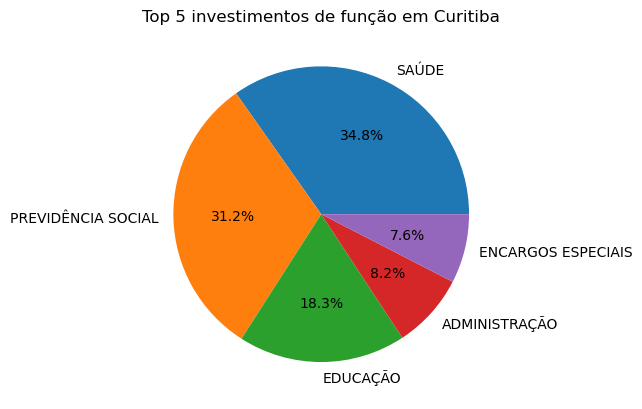

In [21]:
# Plotando um gráfico de pizza do top 5 investimentos em função
plt.pie(top_5_funcao, labels=top_5_funcao.index, autopct='%1.1f%%')
plt.title('Top 5 investimentos de função em Curitiba')
plt.show()

### Análise 3: Top 5 programas com mais investimentos realizados pela prefeitura de Curitiba

In [22]:
# Soma dos valores investidos em cada programa da prefeitura
programa_mais_investimento = df_final.groupby('DS_PROGRAMA')['VL_PAGO'].sum().sort_values(ascending=False)
display(programa_mais_investimento)

DS_PROGRAMA
PROGRAMA VIVA CURITIBA TRANSPARENTE     6.384365e+08
PROGRAMA VIVA CURITIBA SAUDÁVEL         5.585965e+08
PROGRAMA VIVA CURITIBA CIDADÃ           3.595568e+08
PROGRAMA DE OPERAÇÕES ESPECIAIS         1.214971e+08
PROGRAMA VIVA CURITIBA MAIS ÁGIL        1.061653e+08
PROGRAMA VIVA UMA NOVA CURITIBA         1.035054e+08
PROGRAMA VIVA CURITIBA QUE NÃO DORME    7.151866e+07
PROGRAMA VIVA CURITIBA TECNOLÓGICA      9.464699e+04
Name: VL_PAGO, dtype: float64

In [23]:
# Ranqueando os investimentos nos programas em um top 5
top_5_programa = programa_mais_investimento.head(5)

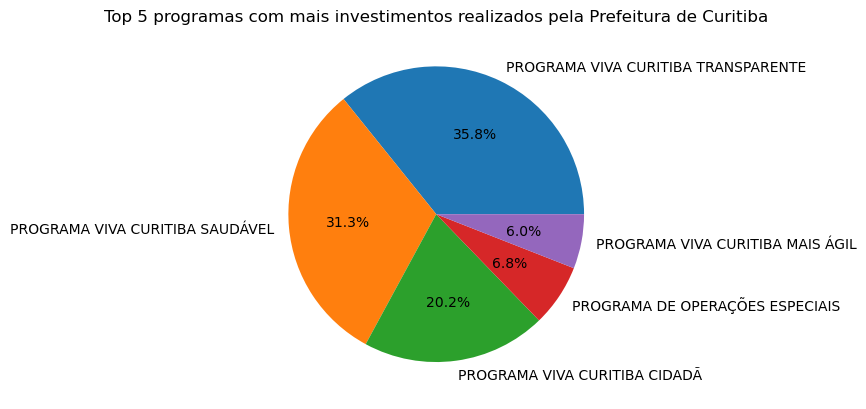

In [24]:
# Plotando um gráfico de pizza do top 5 investimentos em programas
plt.pie(top_5_programa, labels=top_5_programa.index, autopct='%1.1f%%')
plt.title('Top 5 programas com mais investimentos realizados pela Prefeitura de Curitiba')
plt.show()

### Análise 4: Top 5 órgãos que recebem mais investimentos

In [25]:
# Soma dos valores investidos em cada programa da prefeitura
orgao_mais_investimento = df_final.groupby('DS_ORGAO')['VL_PAGO'].sum().sort_values(ascending=False)
display(orgao_mais_investimento)

DS_ORGAO
FUNDO MUNICIPAL DA SAÚDE                                                5.586642e+08
INSTITUTO DE PREVIDÊNCIA DOS SERVIDORES DO MUNICÍPIO DE CURITIBA        3.388243e+08
SECRETARIA MUNICIPAL DA EDUCAÇÃO                                        2.943312e+08
SECRETARIA MUNICIPAL DE ADMINISTRAÇÃO, GESTÃO DE PESSOAL E TEC. INF.    2.373324e+08
ENCARGOS GERAIS DO MUNICÍPIO                                            1.278027e+08
SECRETARIA MUNICIPAL DO MEIO AMBIENTE                                   8.642717e+07
SECRETARIA MUNICIPAL DA DEFESA SOCIAL E TRÂNSITO                        6.432263e+07
SECRETARIA MUNICIPAL DE OBRAS PÚBLICAS                                  5.504101e+07
FUNDAÇÃO DE AÇÃO SOCIAL                                                 2.554414e+07
FUNDO DE ABASTECIMENTO ALIMENTAR DE CURITIBA                            2.477877e+07
FUNDO DE URBANIZAÇÃO DE CURITIBA                                        1.977178e+07
GOVERNO MUNICIPAL                                       

In [26]:
# Ranqueando os investimentos nos órgãos em um top 5
top_5_orgao = orgao_mais_investimento.head(5)

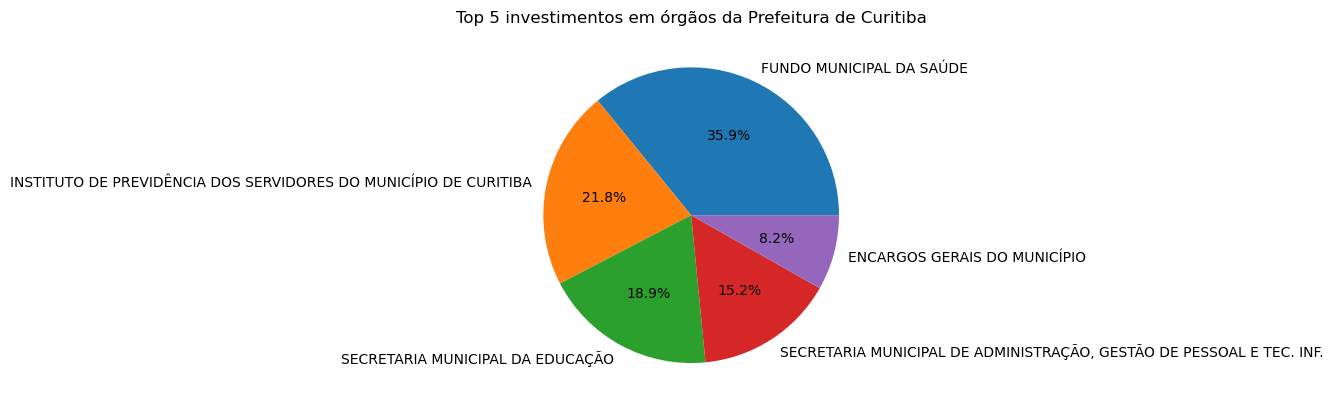

In [27]:
# Plotando um gráfico de pizza do top 5 investimentos em órgãos
plt.pie(top_5_orgao, labels=top_5_orgao.index, autopct='%1.1f%%')
plt.title('Top 5 investimentos em órgãos da Prefeitura de Curitiba')
plt.show()

### Análise 5: Órgãos que recebem investimento com maior frequência

In [28]:
# Orgaos que recebem investimento com mais frequencia
orgao_funcao_investimento_a = df_final.groupby(['DS_ORGAO', 'DS_FUNCAO', 'VL_PAGO']).size().reset_index(name='count')
orgao_funcao_investimento = orgao_funcao_investimento_a.sort_values('count', ascending=False)
display(orgao_funcao_investimento)

,DS_ORGAO,DS_FUNCAO,VL_PAGO,count
6361,SECRETARIA MUNICIPAL DA DEFESA SOCIAL E TRÂNSITO,ENCARGOS ESPECIAIS,104.13,128
5244,FUNDO MUNICIPAL PARA CRIANÇA E O ADOLESCENTE,ASSISTÊNCIA SOCIAL,998.00,96
284,ENCARGOS GERAIS DO MUNICÍPIO,ENCARGOS ESPECIAIS,401.79,72
285,ENCARGOS GERAIS DO MUNICÍPIO,ENCARGOS ESPECIAIS,401.80,57
4651,FUNDO MUNICIPAL DE ASSISTÊNCIA SOCIAL,ASSISTÊNCIA SOCIAL,305.32,48
...,...,...,...,...
3030,FUNDO MUNICIPAL DA SAÚDE,SAÚDE,7.88,1
3029,FUNDO MUNICIPAL DA SAÚDE,SAÚDE,7.49,1
3028,FUNDO MUNICIPAL DA SAÚDE,SAÚDE,6.31,1
3027,FUNDO MUNICIPAL DA SAÚDE,SAÚDE,2.12,1


In [29]:
top5_orgao = orgao_funcao_investimento.head(5)

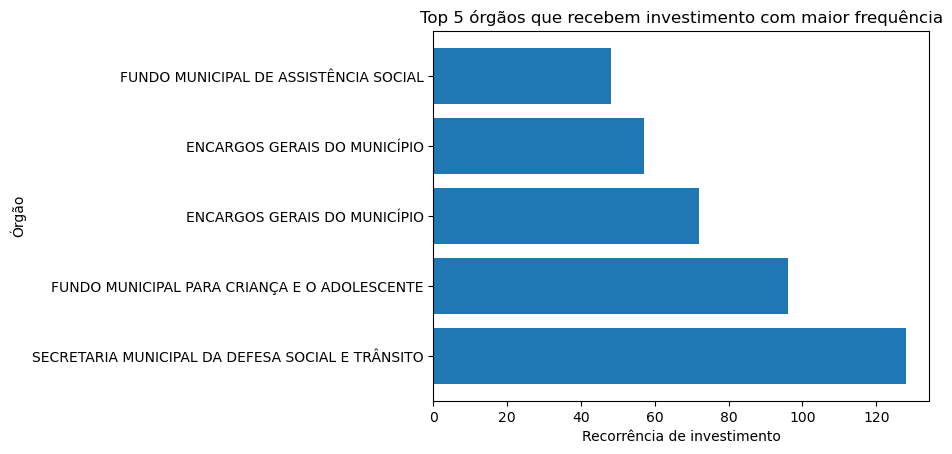

In [30]:
plt.barh(range(len(top5_orgao)), top5_orgao['count'], tick_label=top5_orgao['DS_ORGAO'])
plt.xlabel('Recorrência de investimento')
plt.ylabel('Órgão')
plt.title('Top 5 órgãos que recebem investimento com maior frequência')

plt.show()

### Análise 6: Dias de maior investimento público 

In [31]:
# Dias de MAIS investimento por Orgao publico e seus valores
orgao_mais_investimento_ano_a = df_final.groupby(['DT_EMPENHO', 'DS_ORGAO', 'VL_PAGO']).size().reset_index(name='count')
orgao_mais_investimento_ano = orgao_mais_investimento_ano_a.sort_values('VL_PAGO', ascending=False)
top25 = orgao_mais_investimento_ano.head(25)
top25.head()

,DT_EMPENHO,DS_ORGAO,VL_PAGO,count
7438,2023-03-24,INSTITUTO DE PREVIDÊNCIA DOS SERVIDORES DO MUN...,73907894.12,1
3366,2023-02-23,INSTITUTO DE PREVIDÊNCIA DOS SERVIDORES DO MUN...,73731323.54,1
9723,2023-04-20,INSTITUTO DE PREVIDÊNCIA DOS SERVIDORES DO MUN...,72974037.04,1
8122,2023-04-03,INSTITUTO DE PREVIDÊNCIA DOS SERVIDORES DO MUN...,59941865.10,1
4016,2023-03-02,"SECRETARIA MUNICIPAL DE ADMINISTRAÇÃO, GESTÃO ...",51346675.04,1


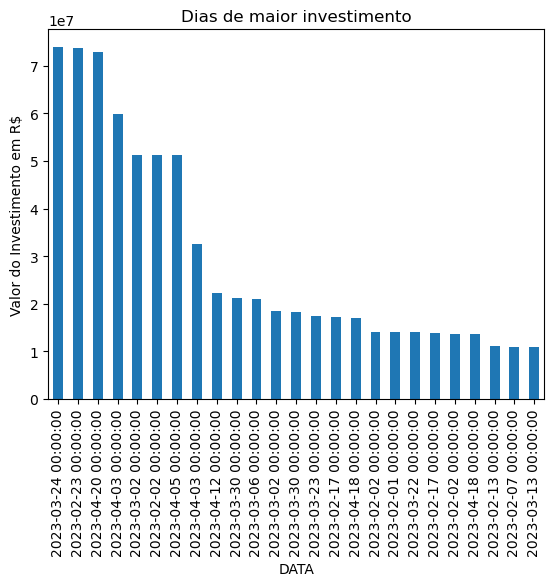

In [32]:
# Plotando grafico com os 25 primeiros valores para visualização
top25.plot(x='DT_EMPENHO', y='VL_PAGO', kind='bar', legend=None)
plt.xlabel('DATA')
plt.ylabel('Valor do Investimento em R$')
plt.title('Dias de maior investimento')
plt.show()

### 3.5 Experimentos com frameworks de big data
Na sequência, serão realizadas as mesmas análises do tópico "3.2 Análise Exploratória dos dados", contudo, para essas análises serâo utilizadas técnicas e frameworks de Big Data

In [33]:
# Cria uma instância do SparkSession
spark = SparkSession.builder.getOrCreate()

# Lendo o arquivo df_final e carregando os dados em um DataFrame
df = spark.read.csv("C:/Users/asche/Documentos/df_final.csv", header=True, sep=",")

In [34]:
# Verificando o formato do arquivo 
df.printSchema()

root
 |-- ANO_EMPENHO: string (nullable = true)
 |-- DT_EMPENHO: string (nullable = true)
 |-- CD_FUNCAO: string (nullable = true)
 |-- DS_FUNCAO: string (nullable = true)
 |-- CD_PROGRAMA: string (nullable = true)
 |-- DS_PROGRAMA: string (nullable = true)
 |-- CD_ORGAO: string (nullable = true)
 |-- DS_ORGAO: string (nullable = true)
 |-- VL_PAGO: string (nullable = true)



In [35]:
# Verificando as 5 primeiras linhas usando o formato do Pandas
df.limit(5).toPandas()

,ANO_EMPENHO,DT_EMPENHO,CD_FUNCAO,DS_FUNCAO,CD_PROGRAMA,DS_PROGRAMA,CD_ORGAO,DS_ORGAO,VL_PAGO
0,2023-01-01,2023-02-03,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,44,FUNDO MUNICIPAL DOS DIREITOS DA PESSOA IDOSA,15.26
1,2023-01-01,2023-03-16,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,37,FUNDO MUNICIPAL DE APOIO AO DEFICIENTE,140400.0
2,2023-01-01,2023-03-10,13,CULTURA,0002,PROGRAMA VIVA CURITIBA CIDADÃ,36,FUNDO MUNICIPAL DA CULTURA,2500.0
3,2023-01-01,2023-03-10,13,CULTURA,0002,PROGRAMA VIVA CURITIBA CIDADÃ,36,FUNDO MUNICIPAL DA CULTURA,2500.0
4,2023-01-01,2023-02-07,08,ASSISTÊNCIA SOCIAL,0001,PROGRAMA VIVA CURITIBA QUE NÃO DORME,44,FUNDO MUNICIPAL DOS DIREITOS DA PESSOA IDOSA,6758.54


### Análise 1: Estatística descritiva dos dados utilizando frameworks de Big Data 

In [36]:
# Criando uma visualização temporária para o DF
df.createOrReplaceTempView("df_temp")

# Executando uma consulta SQL que mostre a estatística descritiva do conjunto de dados
query = """
    SELECT 
        COUNT(*) AS Count, 
        AVG(VL_PAGO) AS Mean, 
        STDDEV(VL_PAGO) AS StdDev, 
        MIN(VL_PAGO) AS Min, 
        MAX(VL_PAGO) AS Max, 
        percentile_approx(VL_PAGO, 0.25) AS Q1, 
        percentile_approx(VL_PAGO, 0.5) AS Q2, 
        percentile_approx(VL_PAGO, 0.75) AS Q3
    FROM df_temp
"""
estatistica_descritiva = spark.sql(query)

# Exibir a estatística descritiva e os quartis
estatistica_descritiva.show()

+-----+------------------+------------------+----+--------+------+------+-------+
|Count|              Mean|            StdDev| Min|     Max|    Q1|    Q2|     Q3|
+-----+------------------+------------------+----+--------+------+------+-------+
|13194|148504.68694255126|1660922.1685403786|0.01|99988.37|522.48|2344.0|18095.0|
+-----+------------------+------------------+----+--------+------+------+-------+



### Análise 2: Top 5 funções com maior despesa realizada pela Prefeitura de Curitiba

In [37]:
# Executar uma consulta SQL para obter as 5 funções que mais gastaram em Curitiba
query = """
    SELECT DS_FUNCAO, SUM(VL_PAGO) AS DespesaTotal
    FROM df_temp
    GROUP BY DS_FUNCAO
    ORDER BY DespesaTotal DESC
    LIMIT 5
"""

despesa_total_por_funcao = spark.sql(query)

# Mostrando as 5 funções que mais gastaram 
despesa_total_por_funcao.show()

+------------------+--------------------+
|         DS_FUNCAO|        DespesaTotal|
+------------------+--------------------+
|             SAÚDE| 5.585964813499993E8|
|PREVIDÊNCIA SOCIAL| 5.008501598900002E8|
|          EDUCAÇÃO| 2.942543448899998E8|
|     ADMINISTRAÇÃO|1.3156648564000002E8|
|ENCARGOS ESPECIAIS|1.2149707282000008E8|
+------------------+--------------------+



### Análise 3: Top 5 programas com maior despesa realizada pela Prefeitura de Curitiba

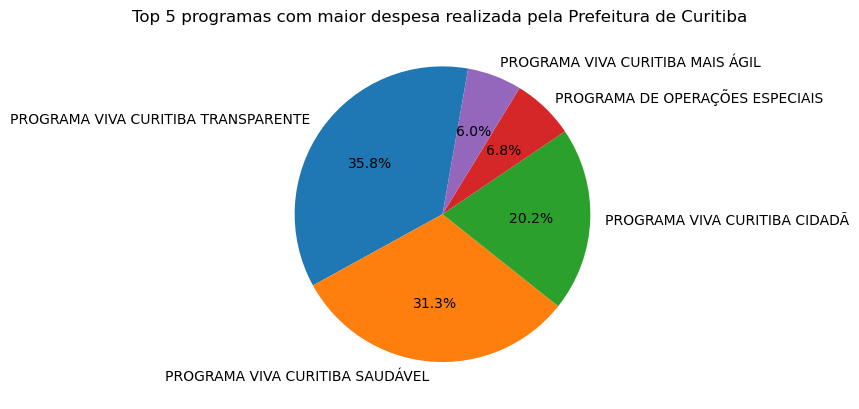

In [38]:
# Executando uma consulta SQL para obter os 5 programas com maiores despesas
query = """
    SELECT DS_PROGRAMA, SUM(VL_PAGO) AS DespesaTotal
    FROM df_temp
    GROUP BY DS_PROGRAMA
    ORDER BY DespesaTotal DESC
    LIMIT 5
"""

despesa_total_por_programa = spark.sql(query)

# Coletando os dados do DataFrame resultante
dados = despesa_total_por_programa.collect()

# Extraindo os nomes dos programas e os valores das despesas
programas = [row["DS_PROGRAMA"] for row in dados]
despesas = [row["DespesaTotal"] for row in dados]

# Configurando o gráfico
plt.pie(despesas, labels=programas, autopct='%1.1f%%', startangle=80)

# Inserindo um título no gráfico
plt.title("Top 5 programas com maior despesa realizada pela Prefeitura de Curitiba ")

# Mostrando o gráfico
plt.show()

### Análise 4: Top 5 órgãos que mais gastam na Prefeitura de Curitiba

In [39]:
# Executando uma consulta SQL para obter os 5 órgãos que mais gastaram em Curitiba
query = """
    SELECT DS_ORGAO, SUM(VL_PAGO) AS TotalGasto
    FROM df_temp
    GROUP BY DS_ORGAO
    ORDER BY TotalGasto DESC
    LIMIT 5
"""

orgaos_mais_gastaram = spark.sql(query)

# Convertendo para um DF do Pandas
orgaos_mais_gastaram_pandas = orgaos_mais_gastaram.toPandas()

# Exibir a tabela
print(orgaos_mais_gastaram_pandas)

                                            DS_ORGAO    TotalGasto
0                           FUNDO MUNICIPAL DA SAÚDE  5.586642e+08
1  INSTITUTO DE PREVIDÊNCIA DOS SERVIDORES DO MUN...  3.388243e+08
2                   SECRETARIA MUNICIPAL DA EDUCAÇÃO  2.943312e+08
3  SECRETARIA MUNICIPAL DE ADMINISTRAÇÃO, GESTÃO ...  2.373324e+08
4                       ENCARGOS GERAIS DO MUNICÍPIO  1.278027e+08


### Análise 5: Top 5 órgãos que gastam com maior frequência na Prefeitura de Curitiba

                                           DS_ORGAO  Frequencia
0                      ENCARGOS GERAIS DO MUNICÍPIO        2459
1                          FUNDO MUNICIPAL DA SAÚDE        2209
2             FUNDO MUNICIPAL DE ASSISTÊNCIA SOCIAL        1806
3                  SECRETARIA MUNICIPAL DA EDUCAÇÃO         863
4  SECRETARIA MUNICIPAL DA DEFESA SOCIAL E TRÂNSITO         680


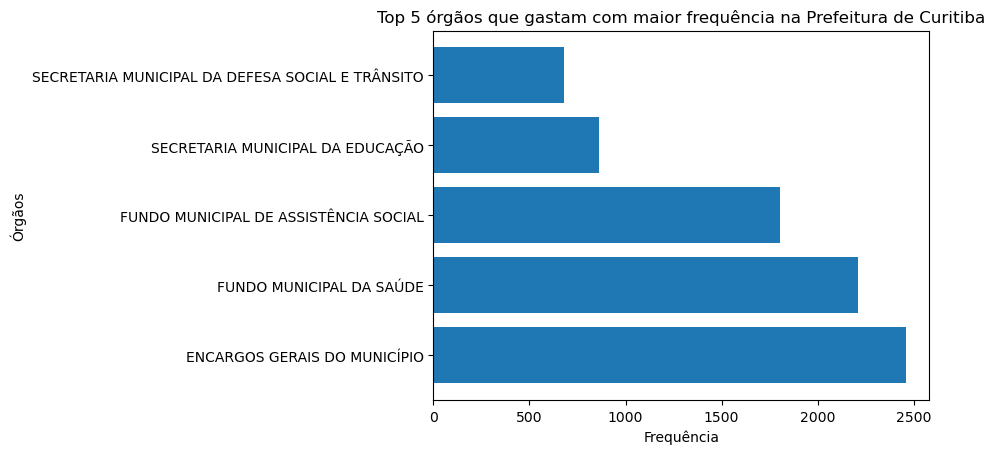

In [40]:
# Executando uma consulta SQL para obter os 5 órgãos que gastam com maior frequência na Prefeitura de Curitiba
query = """
    SELECT DS_ORGAO, COUNT(*) AS Frequencia
    FROM df_temp
    GROUP BY DS_ORGAO
    ORDER BY Frequencia DESC
    LIMIT 5
"""

orgaos_gastam_maior_frequencia = spark.sql(query)

# Convertendo para um DF do Pandas
orgaos_gastam_maior_frequencia_pandas = orgaos_gastam_maior_frequencia.toPandas()

# Exibindo a tabela
print(orgaos_gastam_maior_frequencia_pandas)

# Configurando o gráfico
plt.barh(orgaos_gastam_maior_frequencia_pandas['DS_ORGAO'], orgaos_gastam_maior_frequencia_pandas['Frequencia'])

# Adicionando rótulos nos eixos x e y
plt.xlabel('Frequência')
plt.ylabel('Órgãos')

# Adicionando um título ao gráfico
plt.title('Top 5 órgãos que gastam com maior frequência na Prefeitura de Curitiba')

# Exibindo o gráfico
plt.show()

### Análise 6: Datas com maiores gastos realizados pela Prefeitura de Curitiba

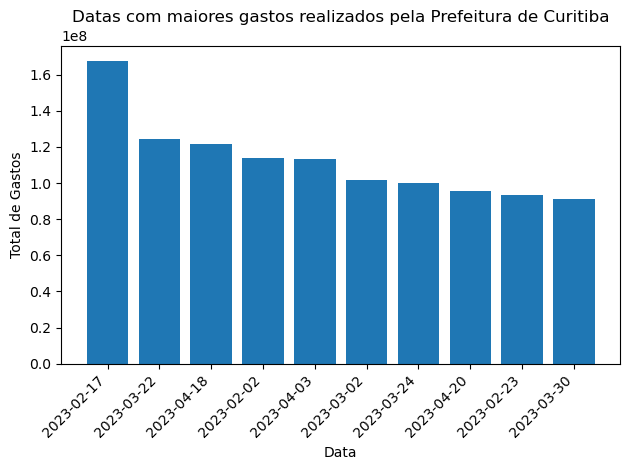

In [41]:
# Executando uma consulta SQL para obter as datas com maiores gastos realizados
query = """
    SELECT DT_EMPENHO, SUM(VL_PAGO) AS TotalGasto
    FROM df_temp
    GROUP BY DT_EMPENHO
    ORDER BY TotalGasto DESC
    LIMIT 10
"""

data_maiores_gastos = spark.sql(query)

# Convertendo para um DF Pandas
data_maiores_gastos_pandas = data_maiores_gastos.toPandas()

# Configurando o gráfico de barras
plt.bar(data_maiores_gastos_pandas['DT_EMPENHO'], data_maiores_gastos_pandas['TotalGasto'])

# Colocando os rótulos do eixo x em 45 graus para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adicionando rótulos nos eixos x e y
plt.xlabel('Data')
plt.ylabel('Total de Gastos')

# Adicionando um título ao gráfico
plt.title('Datas com maiores gastos realizados pela Prefeitura de Curitiba')

# Exibir o gráfico
plt.tight_layout()
plt.show()

## 4. Modelagem e treinamento

### 4.1 Aplicação do modelo 1: Regressão Linear para os gastos realizados pela prefeitura de Curitiba

In [42]:
# Preparação dos dados para a análise de regressão:
# X são as variáveis independentes
# Y é a variável dependente que pretendemos prever (gastos totais)

X = df_final[['ANO_EMPENHO', 'CD_FUNCAO', 'CD_PROGRAMA', 'CD_ORGAO']].copy()
X['ANO_EMPENHO'] = pd.to_datetime(X['ANO_EMPENHO'], format='%Y')
X['ANO_EMPENHO'] = X['ANO_EMPENHO'].dt.year
y = df_final['VL_PAGO']

# Segmentação em treinamento (40%), validação (30%) e teste (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
                                                
# Criando uma instância do modelo de regressão linear e treiná-lo
model = LinearRegression()
model.fit(X_train, y_train)

# Mostrando os valores dos gastos totais previstos
y_pred = model.predict(X_test)
                                                
# Convertendo o array de valores previstos em um DataFrame
df_gastos_previstos = pd.DataFrame({'Data': X_test['ANO_EMPENHO'], 'Gastos Previstos': y_pred})

# Convertendo a coluna 'Data' para o formato de data
df_gastos_previstos['Data'] = pd.to_datetime(df_gastos_previstos['Data'], format='%Y').dt.strftime('%m/%Y')

# Exibindo a tabela com os valores previstos
print(df_gastos_previstos)
                                                
# Calculando a métrica de avaliação do modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('RMSE=', rmse)
print('R²=', r2)

          Data  Gastos Previstos
4831   01/2023     158406.128641
14411  01/2023     170053.571390
21140  01/2023     215126.551606
5028   01/2023     120659.380479
25754  01/2023     173445.101685
...        ...               ...
14331  01/2023     170053.571390
20408  01/2023      48791.660052
21447  01/2023     215126.551606
14656  01/2023     170053.571390
18906  01/2023     202107.279398

[2639 rows x 2 columns]
RMSE= 2204619.5305759325
R²= 0.004156757867812555


### 4.2 Aplicação do modelo 2: Regressão de Árvore de Decisão para os gastos realizados pela prefeitura de Curitiba

In [43]:
# Criando uma instância do modelo de regressão de árvore de decisão
modelo_arvore_decisao = DecisionTreeRegressor()

# Treinando o modelo
modelo_arvore_decisao.fit(X_train, y_train)

# Prevendo os valores dos gastos para o conjunto de teste
y_pred_tree = modelo_arvore_decisao.predict(X_test)

# Convertendo o array de valores previstos em um DataFrame
df_gastos_previstos = pd.DataFrame({'Data': X_test['ANO_EMPENHO'], 'Gastos Previstos': y_pred_tree})

# Convertendo a coluna 'Data' para o formato de data
df_gastos_previstos['Data'] = pd.to_datetime(df_gastos_previstos['Data'], format='%Y').dt.strftime('%m/%Y')

# Exibindo a tabela com os valores previstos
print(df_gastos_previstos)

# Calculando a métrica de avaliação do modelo
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
r2_tree = r2_score(y_test, y_pred_tree)

print('RMSE=', rmse_tree)
print('R²=', r2_tree)

          Data  Gastos Previstos
4831   01/2023      45414.335727
14411  01/2023     240632.430746
21140  01/2023     235780.449722
5028   01/2023      30618.133988
25754  01/2023      49065.126774
...        ...               ...
14331  01/2023     240632.430746
20408  01/2023     381141.275172
21447  01/2023     235780.449722
14656  01/2023     240632.430746
18906  01/2023      19368.384375

[2639 rows x 2 columns]
RMSE= 1918693.6359854923
R²= 0.2457159057847551


### 4.3 Aplicação do modelo 3: Regressão de Floresta Aleatória para os gastos realizados pela prefeitura de Curitiba

In [44]:
# Criando uma instância do modelo de regressão de floresta aleatória
modelo_floresta_aleatoria = RandomForestRegressor()

# Preparando os dados para a análise de regressão:
df_final.loc[:, 'ANO_EMPENHO'] = pd.to_datetime(df_final['ANO_EMPENHO']).dt.year.astype(int)
X = df_final[['ANO_EMPENHO', 'CD_FUNCAO', 'CD_PROGRAMA', 'CD_ORGAO']]
y = df_final['VL_PAGO']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
modelo_floresta_aleatoria.fit(X_train, y_train)

# Prevendo os valores de gastos totais para o conjunto de teste
gastos_previstos = modelo_floresta_aleatoria.predict(X_test)

# Convertendo o array de valores previstos em um DataFrame
df_gastos_previstos = pd.DataFrame({'Data': X_test['ANO_EMPENHO'], 'Gastos Previstos': gastos_previstos})

# Convertendo a coluna 'Data' para o formato de data
df_gastos_previstos['Data'] = pd.to_datetime(df_gastos_previstos['Data'], format='%Y').dt.strftime('%m/%Y')

# Exibindo a tabela com os valores previstos
print(df_gastos_previstos)

# Calculando a métrica de avaliação do modelo
rmse_forest = mean_squared_error(y_test, gastos_previstos, squared=False)
r2_forest = r2_score(y_test, gastos_previstos)

print('RMSE:', rmse_forest)
print('R²:', r2_forest)

C:\Users\asche\AppData\Local\Temp\ipykernel_996\4176465875.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[:, 'ANO_EMPENHO'] = pd.to_datetime(df_final['ANO_EMPENHO']).dt.year.astype(int)


          Data  Gastos Previstos
18527  01/2023      53344.452108
20052  01/2023     129677.799132
12138  01/2023       9123.947816
32248  01/2023     371633.214138
23353  01/2023     522637.001038
...        ...               ...
225    01/2023     146602.393435
5881   01/2023       9123.947816
5981   01/2023       9123.947816
14775  01/2023     244993.083675
26533  01/2023      33960.958579

[2639 rows x 2 columns]
RMSE: 2369252.9675477436
R²: 0.15998636698505642


## 5. Otimização do modelo

### 5.1 Otimização do modelo de  Regressão Linear para os gastos realizados pela prefeitura de Curitiba

In [45]:
# Convertendo as colunas categóricas em variáveis dummy
X_var_convertidas = pd.get_dummies(X, columns=['CD_FUNCAO', 'CD_PROGRAMA', 'CD_ORGAO'])

y = df_final['VL_PAGO']

# Segmentação em treinamento (70%), validação (15%) e teste (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_var_convertidas, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Definição dos valores a serem testados para o hiperparâmetro
hiperparametros_grid = {'fit_intercept': [True, False]}

# Criando uma instância do modelo de regressão linear
modelo = LinearRegression()

# Criando uma instância do GridSearchCV
hiperparametros_otimizados = GridSearchCV(model, hiperparametros_grid, scoring='neg_mean_squared_error', cv=5)

# Executando a busca em grade para encontrar a melhor combinação de hiperparâmetros
hiperparametros_otimizados.fit(X_train, y_train)

# Salvando o melhor modelo
melhor_modelo = hiperparametros_otimizados.best_estimator_

# Mostrando os valores dos gastos previstos com o melhor modelo
y_pred = melhor_modelo.predict(X_test)

# Convertendo o array de valores previstos em um DataFrame
df_gastos_previstos = pd.DataFrame({'Data': X_test['ANO_EMPENHO'], 'Gastos Previstos': y_pred})

# Convertendo a coluna 'Data' para o formato de data
df_gastos_previstos['Data'] = pd.to_datetime(df_gastos_previstos['Data'], format='%Y').dt.strftime('%m/%Y')

# Exibindo a tabela com os valores previstos
print(df_gastos_previstos)

# Calculando a métrica de avaliação do modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('RMSE=', rmse)
print('R²=', r2)

          Data  Gastos Previstos
5006   01/2023      42009.193359
10729  01/2023       9813.281250
28631  01/2023      59066.191406
21762  01/2023     262554.267578
7883   01/2023       9813.281250
...        ...               ...
32591  01/2023      83275.703125
7207   01/2023      29549.335938
22656  01/2023      59066.191406
17475  01/2023     262554.267578
1079   01/2023      -5243.974609

[1980 rows x 2 columns]
RMSE= 1908760.8792225574
R²= 0.0952758388879218


### 5.2 Otimização do modelo de Regressão de Árvore de Decisão para os gastos realizados pela prefeitura de Curitiba

In [46]:
# Segmentação em treinamento (70%), validação (15%) e teste (15%)
X_train_tree, X_temp_tree, y_train_tree, y_temp_tree = train_test_split(X_var_convertidas, y, test_size=0.3, random_state=42)
X_val_tree, X_test_tree, y_val_tree, y_test_tree = train_test_split(X_temp_tree, y_temp_tree, test_size=0.5, random_state=42)

# Definição dos valores a serem testados para o hiperparâmetro
hiperparametros_random = {'max_depth': [None, 5, 10, 15],
                               'min_samples_split': randint(2, 11),
                               'min_samples_leaf': randint(1, 5)}

# Criando uma instância do modelo de regressão de árvore de decisão
modelo_arvore_decisao = DecisionTreeRegressor()

# Criando uma instância do RandomizedSearchCV
random_search = RandomizedSearchCV(modelo_arvore_decisao, hiperparametros_random, scoring='neg_mean_squared_error', cv=5)

# Executando a busca aleatória para encontrar a melhor combinação de hiperparâmetros
random_search.fit(X_train_tree, y_train_tree)

# Obtendo o melhor modelo com os hiperparâmetros otimizados
melhor_modelo_arvore_decisao = random_search.best_estimator_

# Prevendo os valores dos gastos para o conjunto de teste com o melhor modelo
y_pred_tree = melhor_modelo_arvore_decisao.predict(X_test_tree)

# Convertendo o array de valores previstos em um DataFrame
#df_gastos_previstos_tree = pd.DataFrame({'Data': X_test_tree['ANO_EMPENHO'], 'Gastos Previstos': y_pred_tree})

# Convertendo a coluna 'Data' para o formato de data
#df_gastos_previstos_tree['Data'] = pd.to_datetime(df_gastos_previstos_tree['Data'], format='%Y').dt.strftime('%m/%Y')

# Exibindo a tabela com os valores previstos
print(df_gastos_previstos)

# Calculando a métrica de avaliação do modelo
rmse_tree = mean_squared_error(y_test_tree, y_pred_tree, squared=False)
r2_tree = r2_score(y_test_tree, y_pred_tree)

print('RMSE =', rmse_tree)
print('R² =', r2_tree)

          Data  Gastos Previstos
5006   01/2023      42009.193359
10729  01/2023       9813.281250
28631  01/2023      59066.191406
21762  01/2023     262554.267578
7883   01/2023       9813.281250
...        ...               ...
32591  01/2023      83275.703125
7207   01/2023      29549.335938
22656  01/2023      59066.191406
17475  01/2023     262554.267578
1079   01/2023      -5243.974609

[1980 rows x 2 columns]
RMSE = 1579918.2928718063
R² = 0.3801560125909752


## 6. Conclusão

O presente projeto teve como objetivo principal analisar os gastos públicos para a prefeitura de Curitiba, por meio de técnicas de Machine Learning, Big Data e Análise Exploratória dos dados, visando fornecer insights e suporte para a tomada de decisão e benefícios significativos para a sociedade.

Com base na análise exploratória dos dados apresentada no tópico 3 deste trabalho, foi possível evidenciar as cinco principais funções, programas e órgãos que recebem investimentos da prefeitura de Curitiba durante o período de 01/02/2023 a 28/04/2023. Dessa forma, o estudo possibilitou identificar as áreas que recebem mais investimentos, sendo elas: Saúde (34,8%), Previdência Social (31,2%), Educação (18,3%), Administração (8,2%) e Encargos Especiais (7,6%).

Em relação aos programas, destacaram-se o Programa Viva Curitiba Transparente (35,8%), Programa Viva Curitiba Saudável (31,3%), Programa Viva Curitiba Cidadã (20,2%), Programa de Operações Especiais (6,8%) e Programa Viva Curitiba Mais Ágil (6%).
Quanto aos órgãos, os principais beneficiados foram o Fundo Municipal da Saúde (35,9%), Instituto de Previdência dos Servidores do Município de Curitiba (21,8%), Secretaria Municipal da Educação (18,9%), Secretaria Municipal de Administração e Gestão de Pessoal (15,2%) e Encargos Pessoais (8,2%).

Através da análise estatística descritiva dos dados, foi possível também extrair informações relevantes para o projeto, como os valores mínimo, máximo, média e desvio padrão dos pagamentos realizados. Além disso, os quartis foram úteis para identificar a faixa de valores em que a maioria dos gastos se concentra.

No tópico 3.3, foram aplicadas técnicas de Big Data para a análise dos gastos públicos da prefeitura de Curitiba. Através da coleta, processamento e análise de grandes volumes de dados, foram identificados insights relevantes. A aplicação do Big Data trouxe resultados promissores, indicando o potencial dessa abordagem para o desenvolvimento de estratégias mais eficazes na administração municipal.

Ao utilizar modelos de regressão linear e de árvore de decisão otimizados nos tópicos 4 e 5, foi possível obter resultados promissores na previsão dos gastos públicos. A aplicação dessas técnicas permitiu uma compreensão mais profunda dos padrões de gastos da prefeitura, identificando fatores relevantes que influenciam os gastos e fornecendo insights valiosos para a administração pública.

Os resultados obtidos demonstraram que, apesar dos desafios inerentes à natureza complexa e volátil dos gastos públicos, é viável obter modelos com certo nível de acurácia em previsões. A otimização desses modelos trouxe melhorias significativas nas métricas de avaliação, tais como a redução do erro médio quadrático (RMSE) e o aumento do coeficiente de determinação (R²). Nesse contexto, o Modelo de Regressão de Árvore de Decisão otimizado, apresentado na Figura 10 deste trabalho, emerge como a opção recomendada entre os modelos analisados para a previsão dos gastos realizados pela prefeitura de Curitiba, pois demonstra um ajuste mais preciso aos dados e uma maior capacidade de explicar a variabilidade dos gastos.

Esses resultados têm implicações práticas significativas para a gestão financeira da prefeitura de Curitiba. Com base nas previsões geradas pelos modelos, a administração pública pode tomar decisões mais embasadas, alocar recursos de forma mais eficiente e otimizar os gastos, visando o melhor atendimento às necessidades da sociedade. Além disso, o suporte fornecido pelo projeto permite uma análise mais criteriosa dos gastos passados e uma projeção mais precisa dos gastos futuros, contribuindo para a tomada de decisões estratégicas e informadas.

O impacto social do projeto é notável, pois a análise detalhada dos gastos públicos permite a alocação adequada de recursos em áreas, programas e órgãos essenciais, como saúde e educação, melhorando a qualidade dos serviços prestados à comunidade. Além disso, a utilização de técnicas avançadas, como Machine Learning e Big Data, impulsiona a administração pública para uma abordagem mais inteligente e inovadora na tomada de decisões, acompanhando as tendências tecnológicas e promovendo o desenvolvimento sustentável da cidade.

Portanto, considerando os benefícios trazidos pelo projeto, o impacto social positivo gerado e os resultados promissores obtidos na análise dos gastos públicos da prefeitura de Curitiba, concluímos que a utilização de técnicas de Big Data, Machine Learning e Análise Exploratória de dados representam um aliado importante para aprimorar a eficiência e transparência da administração pública. Os insights e previsões fornecidos pelos modelos otimizados possibilitam uma tomada de decisão embasada e orientada por dados, impulsionando o progresso da cidade e beneficiando diretamente a sociedade curitibana. Recomenda-se continuar explorando e investindo em projetos similares, visando a expansão e aprimoramento dessa abordagem em outras áreas de gestão pública.